### Prep Data

In [1]:
import pandas as pd
import numpy as np

print ('packages imported!')

packages imported!


In [9]:
import os

wd = os.getcwd ()
print (wd)

/Users/dustin/SQL/Project 2


In [10]:
data = '/Users/dustin/SQL/Project 2/Data/ds_da.csv'
df = pd.read_csv(data)

print ('data imported!')

data imported!


In [11]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,n_experience_level,n_employment_type,n_company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1,3,3
1,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,0,3,3
2,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,1,3,3
3,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,0,3,1
4,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L,1,3,3


In [12]:
df.drop(['id', 'salary_currency', 'salary', 'employee_residence','company_location'], axis = 1, inplace= True)

print ('Columns Dropped!')

Columns Dropped!


### Visualize Data

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

print('packages has been imported!')

packages has been imported!


In [14]:
df.shape

(240, 10)

In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_size', 'n_experience_level',
       'n_employment_type', 'n_company_size'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           240 non-null    int64 
 1   experience_level    240 non-null    object
 2   employment_type     240 non-null    object
 3   job_title           240 non-null    object
 4   salary_in_usd       240 non-null    int64 
 5   remote_ratio        240 non-null    int64 
 6   company_size        240 non-null    object
 7   n_experience_level  240 non-null    int64 
 8   n_employment_type   240 non-null    int64 
 9   n_company_size      240 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 18.9+ KB


In [17]:
df.describe()

,work_year,salary_in_usd,remote_ratio,n_experience_level,n_employment_type,n_company_size
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2021.508333,102006.195833,68.541667,1.354167,2.975000,2.120833
std,0.696625,56037.427142,42.906417,0.728660,0.222669,0.591063
min,2020.000000,2859.000000,0.000000,0.000000,0.000000,1.000000
25%,2021.000000,60975.000000,37.500000,1.000000,3.000000,2.000000
50%,2022.000000,99680.000000,100.000000,1.000000,3.000000,2.000000
75%,2022.000000,135000.000000,100.000000,2.000000,3.000000,2.000000
max,2022.000000,412000.000000,100.000000,3.000000,3.000000,3.000000


In [18]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,3
job_title,2
salary_in_usd,157
remote_ratio,3
company_size,3
n_experience_level,4
n_employment_type,3
n_company_size,3


In [19]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
remote_ratio          0
company_size          0
n_experience_level    0
n_employment_type     0
n_company_size        0
dtype: int64

In [20]:
df.corr()

,work_year,salary_in_usd,remote_ratio,n_experience_level,n_employment_type,n_company_size
work_year,1.000000,0.349039,0.075300,0.492855,0.001349,-0.048184
salary_in_usd,0.349039,1.000000,0.165389,0.545115,0.060363,0.161888
remote_ratio,0.075300,0.165389,1.000000,0.177186,-0.016970,-0.030969
n_experience_level,0.492855,0.545115,0.177186,1.000000,0.132163,0.075089
n_employment_type,0.001349,0.060363,-0.016970,0.132163,1.000000,0.054840
n_company_size,-0.048184,0.161888,-0.030969,0.075089,0.054840,1.000000


Text(0.5, 1.0, 'correlation of feature')

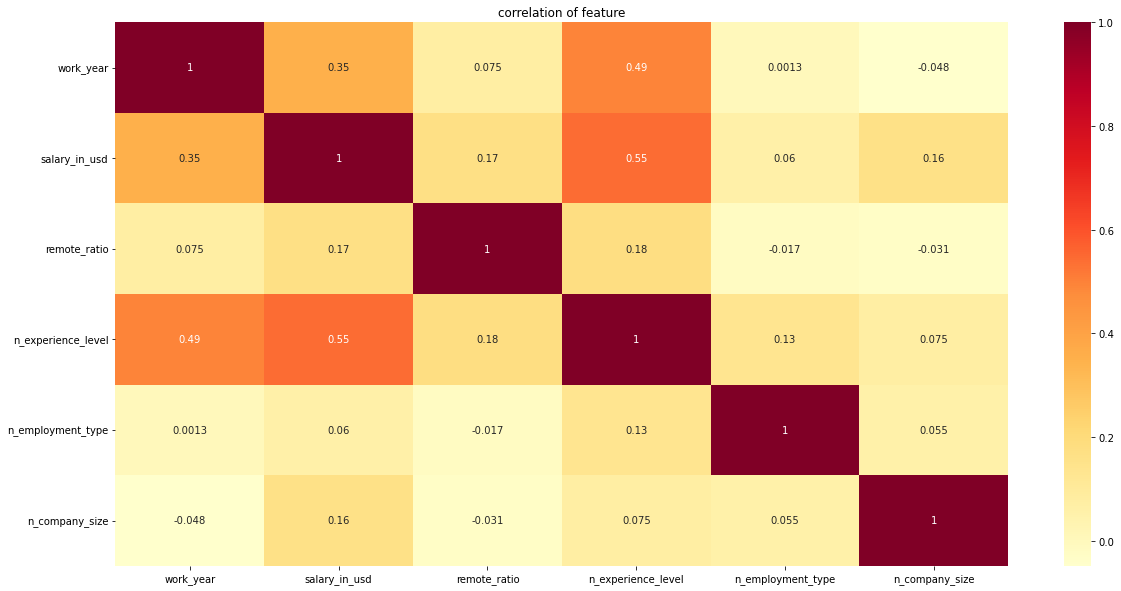

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

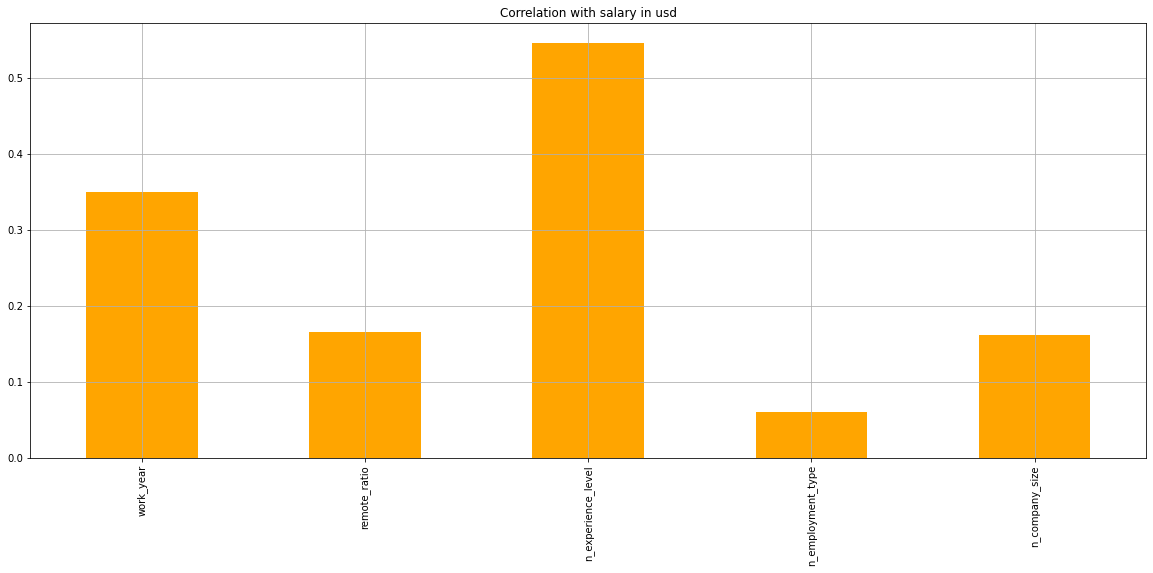

In [22]:
df.drop('salary_in_usd', axis=1).corrwith(df.salary_in_usd).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with salary in usd",color="Orange");

In [24]:
df["job_title_str"]= df["job_title"].replace({"Data Scientist":0, "Data Analyst":1})

In [26]:
df["job_title_str"].value_counts()

0    143
1     97
Name: job_title_str, dtype: int64

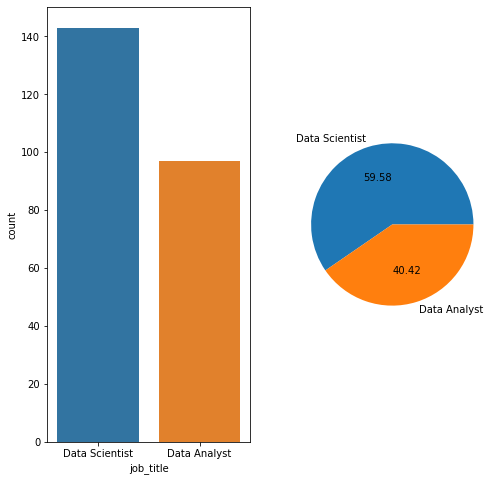

In [27]:
warnings.filterwarnings('ignore')

figure, plot = plt.subplots(1,2,figsize=(8,8))

sns.countplot(df['job_title'],ax=plot[0])

labels=["Data Scientist", "Data Analyst"]

plt.pie(df["job_title"].value_counts() , labels =labels ,autopct='%.02f' );

In [28]:
#number of Data Scientist working remote, hybrid, and in-person

pd.crosstab(df.remote_ratio, df.job_title_str)

job_title_str,0,1
remote_ratio,,
0,39,21
50,25,6
100,79,70


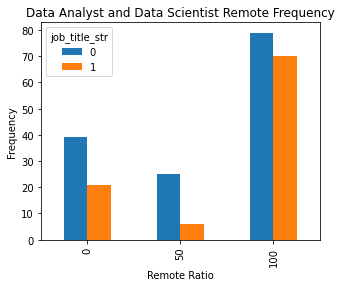

In [53]:
pd.crosstab(df.remote_ratio,df.job_title_str).plot(kind="bar",figsize=(5,4))

plt.title('Data Analyst and Data Scientist Remote Frequency')
plt.xlabel("Remote Ratio")
plt.ylabel('Frequency')
plt.show()

In [45]:
df["remote_ratio_str"]= df["remote_ratio"].replace({'In-Person':0, 'Hybrid': 50, 'Remote': 100})
print('replaced!')

replaced!


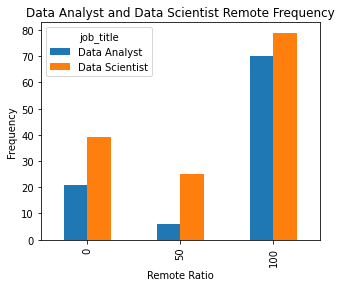

In [54]:
pd.crosstab(df.remote_ratio_str,df.job_title).plot(kind="bar",figsize=(5,4))

plt.title('Data Analyst and Data Scientist Remote Frequency')
plt.xlabel("Remote Ratio")
plt.ylabel('Frequency')
plt.show()

In [44]:
# checking average of Data Analyst and Data Scientist working remote, hybrid, inperson

(df.groupby("job_title_str")["remote_ratio_str"].value_counts()/df.groupby("job_title_str")["remote_ratio_str"].count())*100

job_title_str  remote_ratio_str
0              100                 55.244755
               0                   27.272727
               50                  17.482517
1              100                 72.164948
               0                   21.649485
               50                   6.185567
Name: remote_ratio_str, dtype: float64

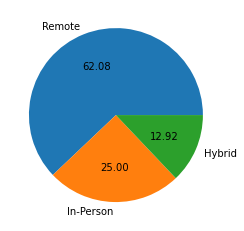

In [49]:
# checking remote_ratio average by pie 

labels=["Remote","In-Person","Hybrid"]

plt.pie(df["remote_ratio"].value_counts() , labels =labels ,autopct='%.02f' );

In [50]:
#number of Data Scientist working remote, hybrid, and in-person

pd.crosstab(df.experience_level, df.job_title_str)

job_title_str,0,1
experience_level,,
EN,22,12
EX,0,2
MI,60,29
SE,61,54


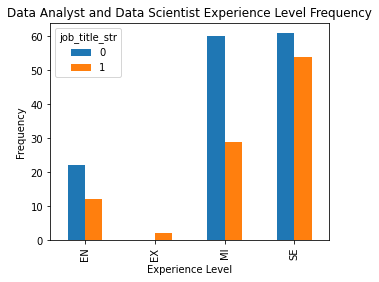

In [56]:
pd.crosstab(df.experience_level,df.job_title_str).plot(kind="bar",figsize=(5,4))

plt.title('Data Analyst and Data Scientist Experience Level Frequency')
plt.xlabel("Experience Level")
plt.ylabel('Frequency')
plt.show()

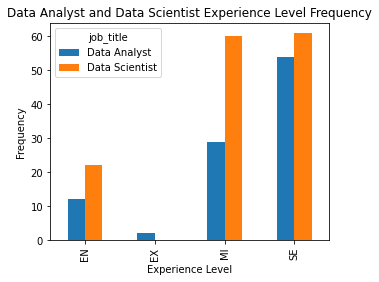

In [55]:
pd.crosstab(df.experience_level,df.job_title).plot(kind="bar",figsize=(5,4))

plt.title('Data Analyst and Data Scientist Experience Level Frequency')
plt.xlabel("Experience Level")
plt.ylabel('Frequency')
plt.show()

In [58]:
# checking average of each experience level for Data Analyst and Data Scientist

(df.groupby("job_title")["experience_level"].value_counts()/df.groupby("job_title")["experience_level"].count())*100

job_title       experience_level
Data Analyst    SE                  55.670103
                MI                  29.896907
                EN                  12.371134
                EX                   2.061856
Data Scientist  SE                  42.657343
                MI                  41.958042
                EN                  15.384615
Name: experience_level, dtype: float64

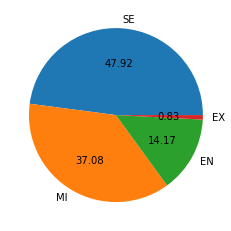

In [59]:
# checking remote_ratio average by pie 

labels=["SE","MI","EN","EX"]

plt.pie(df["experience_level"].value_counts() , labels =labels ,autopct='%.02f' );


In [63]:
# checking HighBP and HighChol's combined effect on Diabetes

(df.groupby(["remote_ratio" , "experience_level",])["job_title"].value_counts()/df.groupby(["remote_ratio" , "experience_level"])["job_title"].count())*100

remote_ratio  experience_level  job_title     
0             EN                Data Scientist     62.500000
                                Data Analyst       37.500000
              MI                Data Scientist     64.285714
                                Data Analyst       35.714286
              SE                Data Scientist     66.666667
                                Data Analyst       33.333333
50            EN                Data Scientist     80.000000
                                Data Analyst       20.000000
              MI                Data Scientist     81.250000
                                Data Analyst       18.750000
              SE                Data Scientist     80.000000
                                Data Analyst       20.000000
100           EN                Data Scientist     56.250000
                                Data Analyst       43.750000
              EX                Data Analyst      100.000000
              MI                Data S

Text(0.5, 1.0, 'Relation b/w experience level, remote ratio, and job title')

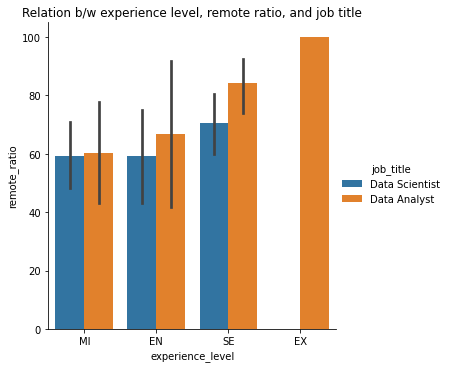

In [64]:
sns.catplot(x="experience_level" , y ="remote_ratio" , data = df , hue="job_title" , kind="bar" );
plt.title("Relation b/w experience level, remote ratio, and job title")


In [65]:
#making 3 groups for years
#checking Data Analyst and Data Scientist in 2020

df[(df["work_year"] == 2020)]["job_title"].value_counts()

Data Scientist    21
Data Analyst       7
Name: job_title, dtype: int64

In [67]:
df[(df["work_year"] == 2021)]["job_title"].value_counts()

Data Scientist    45
Data Analyst      17
Name: job_title, dtype: int64

In [68]:
df[(df["work_year"]== 2022)]["job_title"].value_counts()

Data Scientist    77
Data Analyst      73
Name: job_title, dtype: int64

In [71]:
df.head(50)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,n_experience_level,n_employment_type,n_company_size,job_title_str,remote_ratio_str
0,2020,MI,FT,Data Scientist,79833,0,L,1,3,3,0,0
1,2020,EN,FT,Data Analyst,72000,100,L,0,3,3,1,100
2,2020,MI,FT,Data Scientist,35735,50,L,1,3,3,0,50
3,2020,EN,FT,Data Scientist,51321,0,S,0,3,1,0,0
4,2020,MI,FT,Data Scientist,40481,0,L,1,3,3,0,0
5,2020,EN,FT,Data Scientist,39916,0,M,0,3,2,0,0
6,2020,MI,FT,Data Analyst,85000,100,L,1,3,3,1,100
7,2020,MI,FT,Data Analyst,8000,50,L,1,3,3,1,50
8,2020,SE,FT,Data Scientist,68428,100,L,2,3,3,0,100
9,2020,MI,FT,Data Analyst,46759,50,L,1,3,3,1,50


In [74]:
df_2020 = df.loc[((df["work_year"]==2020)&(df["job_title"]=="Data Scientist"))]

print(df_2020)

    work_year experience_level employment_type       job_title  salary_in_usd  \
0        2020               MI              FT  Data Scientist          79833   
2        2020               MI              FT  Data Scientist          35735   
3        2020               EN              FT  Data Scientist          51321   
4        2020               MI              FT  Data Scientist          40481   
5        2020               EN              FT  Data Scientist          39916   
8        2020               SE              FT  Data Scientist          68428   
11       2020               MI              FT  Data Scientist          45760   
12       2020               MI              FT  Data Scientist          76958   
13       2020               MI              FT  Data Scientist         105000   
16       2020               MI              FT  Data Scientist          38776   
17       2020               MI              FT  Data Scientist         118000   
18       2020               

In [75]:
df_ft = df.loc[((df["employment_type"]=='FT'))]


In [76]:
df_ft.to_csv('da_ds_ft.csv')

print('file saved!')

file saved!
